# Problem Statement and Breakdown

**Suppose the course grade is based on 30 assignments (each scored 0 to 100), three projects (each scored 0 to 100), and attendance in 15 classes (each scored as present or absent). The assignments account for 30% of the course grade, the projects are 20% each (60% total), and attendance is 10% of the course grade. Suppose 10 of the 30 assignments are included in the final course score. The 10 are randomly selected. Letter grades are defined in the syllabus​.**

**Turned in code+documentation+visualization in a Jupyter notebook that runs without errors in under 3 minutes, is less than 0.5MB in size, and solves homework assignment: maximum of 100 points.**

# CODE

In [116]:
import pandas as pd
import random as rd

def rdnumber(num,s,e):
    return rd.sample(range(s, e + 1), num)#returns 'num' unique random numbers from a 'start' to 'end' range index
#Creating data and loading it into dataframe
student_Data={
    "Name":['Soumya','Yatharth','Mitaali','Ajay'],
    "Assignments":[
        rdnumber(30,0,100),
        rdnumber(30,0,100),
        rdnumber(30,0,100),
        rdnumber(30,0,100)
    ],
    "Projects":[
        rdnumber(3,0,100),
        rdnumber(3,0,100),
        rdnumber(3,0,100),
        rdnumber(3,0,100)
    ],
    "Attendance":[
        rdnumber(1,0,15),
        rdnumber(1,0,15),
        rdnumber(1,0,15),
        rdnumber(1,0,15)
    ]
}
#There are 3 students in student_data
df=pd.DataFrame(student_Data)

#Selecting 10 random indexes of assignments to be graded. This stays the same for all students
idxAsg=sorted(rdnumber(10,0,29))
print('Index of assignments to be graded \n',idxAsg)

Index of assignments to be graded 
 [3, 5, 6, 9, 11, 13, 14, 15, 26, 28]


In [117]:
df.head()

,Name,Assignments,Projects,Attendance
0,Soumya,"[32, 90, 64, 56, 98, 0, 95, 78, 58, 7, 47, 97,...","[20, 68, 55]",[2]
1,Yatharth,"[9, 78, 4, 73, 99, 57, 63, 46, 91, 68, 29, 90,...","[29, 5, 28]",[5]
2,Mitaali,"[60, 20, 10, 23, 4, 9, 73, 61, 59, 14, 43, 80,...","[82, 98, 77]",[14]
3,Ajay,"[63, 27, 96, 9, 31, 40, 2, 76, 20, 80, 74, 43,...","[10, 7, 71]",[6]


In [118]:
df.iloc[:1,3]

0    [2]
Name: Attendance, dtype: object

In [119]:
df.iloc[0:1,3]

0    [2]
Name: Attendance, dtype: object

In [120]:
df.iloc[:,1]

0    [32, 90, 64, 56, 98, 0, 95, 78, 58, 7, 47, 97,...
1    [9, 78, 4, 73, 99, 57, 63, 46, 91, 68, 29, 90,...
2    [60, 20, 10, 23, 4, 9, 73, 61, 59, 14, 43, 80,...
3    [63, 27, 96, 9, 31, 40, 2, 76, 20, 80, 74, 43,...
Name: Assignments, dtype: object

### EXTRACTING DATA FROM DATAFRAME FOR THE SELECTED STUDENT

In [157]:
#Calculating total grades for student1, can be used to calculate grade for any other student as well
def extraction(stdName):
    #Get all assignments of the selected student
    asg=df.loc[df['Name']==stdName,'Assignments']
    
    #Iterate over idxAsg to store only these indexes of the assignments
    selectedAsg=[]
    for i in idxAsg:
        score=asg.iloc[0][i]
        selectedAsg.append(score)

    #in the df dataframe values of all projects whos name is stdName
    #using iloc[0] returns a list, from a series
    projects=df.loc[df['Name']==stdName,'Projects'].iloc[0]
    
    #in the df dataframe values of all attendance whos name is stdName
    attd=df.loc[df['Name']==stdName,'Attendance'].iloc[0]

    return selectedAsg,projects,attd

### Calculating grades

In [124]:
#Getting letter grade
def gradeCalc(num):
    if totalgrade>=97.00 and totalgrade<=100:
        courseGrade='A'
    elif totalgrade>=90.00 and totalgrade<=96.99:
        courseGrade='A-'
    elif totalgrade>=87.00 and totalgrade<=89.99:
        courseGrade='B+'
    elif totalgrade>=84.00 and totalgrade<=86.99:
        courseGrade='B'
    elif totalgrade>=80.00 and totalgrade<=83.99:
        courseGrade='B-'
    elif totalgrade>=77.00 and totalgrade<=79.99:
        courseGrade='C+'
    elif totalgrade>=74.00 and totalgrade<=76.99:
        courseGrade='C'
    elif totalgrade>=70.00 and totalgrade<=73.99:
        courseGrade='C-'
    elif totalgrade>=60.00 and totalgrade<=69.99:
        courseGrade='D'
    else:
        courseGrade='F'
    return courseGrade
    

#Function for calculating assignment scores
def asgScores(num):
    if num==0:
        return 0
    elif num>=1 and num<=19:
        return 0.5
    elif num>=20 and num<=39:
        return 1
    elif num>=40 and num<=59:
        return 1.5
    elif num>=60 and num<=79:
        return 2
    elif num>=80 and num<=89:
        return 2.5
    else:
        return 3


#Function for calculating project scores
def projectScores(num):
    if num==0:
        return 0
    elif num>=1 and num<=19:
        return 5
    elif num>=20 and num<=39:
        return 8
    elif num>=40 and num<=59:
        return 10
    elif num>=60 and num<=79:
        return 15
    elif num>=80 and num<=89:
        return 18
    else:
        return 20


#Function for calculating attendance scores
def atdScores(num):
    if num==15:
        return 10
    elif num>=11 and num<=14:
        return 8
    elif num>=7 and num<=10:
        return 6
    elif num>=4 and num<=6:
        return 4
    elif num>=1 and num<=3:
        return 2
    else:
        return 0



### User Inputs and calling the functions

In [155]:
totalgrade=0
stdName='Soumya'# can use a user input to make it more interactive
selectedAsg,projects,attd=extraction(stdName)

for i in selectedAsg:
    totalgrade+=asgScores(i)

#Iterate over projects
for i in projects:
    totalgrade+=projectScores(i)

#Iterate over attendance
for i in attd:
    totalgrade+=atdScores(i)


print('Final grade for',stdName,'is:',gradeCalc(totalgrade),'/', totalgrade,'%')
print(type(asg))
#print("\n Selected Assignment scores of",stdName,"are",selectedAsg)
#print('\n 3 projects of',stdName,"are",projects[0])
#print("\n Attendance:",attd[0])

<class 'pandas.core.series.Series'>
Final grade for Soumya is: F / 47.5 %


NameError: name 'asg' is not defined

### Visualization

In [128]:
import matplotlib.pyplot as plt

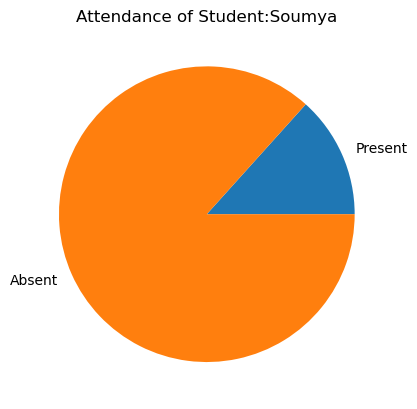

In [129]:
#Attendance pie chart
atdValues=['Present','Absent']
atdData=attd[0],15-attd[0]
plt.pie(atdData, labels=atdValues)
plt.title("Attendance of Student:"+stdName)
plt.show()

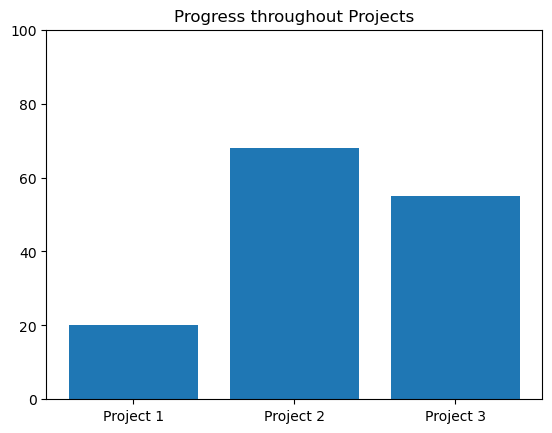

In [130]:
#Projects Bar chart of the selected student
x=['Project 1','Project 2','Project 3']
y=projects

plt.bar(x, y)
plt.title('Progress throughout Projects')
plt.ylim(0,100)
plt.show()
#plt.ylim sets the range for y-axis, which in our case is from 0 to 100. 

### Performance throughout the assignments

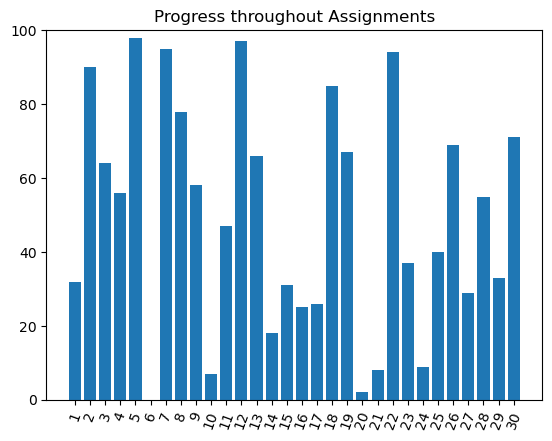

In [132]:
x=list(range(1,31))
y=df.loc[df['Name']==stdName,'Assignments'].iloc[0] 

plt.bar(x, y)
plt.title('Progress throughout Assignments')
plt.ylim(0,100)
plt.xticks(x,rotation=70)
plt.show()